# Apriori Association Rule Mining Example
This notebook demonstrates how to perform market basket analysis using the Apriori algorithm and derive association rules with the `mlxtend` library.

**Contents**
1. Install & import libraries  
2. Build a sample transaction dataset  
3. Convert transactions to one‑hot encoded DataFrame  
4. Discover frequent itemsets with Apriori  
5. Generate association rules  
6. Interpret the results

In [1]:
import sys, platform, datetime, os
print("Python:", sys.version)
print("Executable:", sys.executable)
print("Platform:", platform.platform())

Python: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Executable: /Users/Bellerofonte/opt/anaconda3/bin/python
Platform: Darwin-24.3.0-x86_64-i386-64bit


In [3]:
pip install "scikit-learn==1.0.2" "mlxtend==0.22.0"

Note: you may need to restart the kernel to use updated packages.


In [5]:
try:
    from mlxtend.frequent_patterns import apriori, association_rules
except ImportError:
    !pip -q install mlxtend
    from mlxtend.frequent_patterns import apriori, association_rules

import pandas as pd

In [7]:
# Synthetic market basket dataset
transactions = [
    ['milk', 'bread', 'butter'],
    ['beer', 'bread', 'diapers', 'eggs'],
    ['milk', 'bread', 'diapers', 'beer'],
    ['bread', 'butter'],
    ['milk', 'diapers', 'beer', 'bread'],
    ['milk', 'bread', 'butter', 'eggs']
]
transactions

[['milk', 'bread', 'butter'],
 ['beer', 'bread', 'diapers', 'eggs'],
 ['milk', 'bread', 'diapers', 'beer'],
 ['bread', 'butter'],
 ['milk', 'diapers', 'beer', 'bread'],
 ['milk', 'bread', 'butter', 'eggs']]

In [11]:
# Transform to one‑hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket_df = pd.DataFrame(te_ary, columns=te.columns_)
basket_df.head()

/Users/Bellerofonte/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):


,beer,bread,butter,diapers,eggs,milk
0,False,True,True,False,False,True
1,True,True,False,True,True,False
2,True,True,False,True,False,True
3,False,True,True,False,False,False
4,True,True,False,True,False,True


In [13]:
# Mine frequent itemsets
freq_itemsets = apriori(basket_df, min_support=0.3, use_colnames=True)
freq_itemsets.sort_values('support', ascending=False).reset_index(drop=True)

/Users/Bellerofonte/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/Users/Bellerofonte/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  el

,support,itemsets
0,1.000000,(bread)
1,0.666667,"(milk, bread)"
2,0.666667,(milk)
3,0.500000,(beer)
4,0.500000,"(beer, diapers)"
5,0.500000,"(beer, diapers, bread)"
6,0.500000,"(butter, bread)"
7,0.500000,"(diapers, bread)"
8,0.500000,"(beer, bread)"
9,0.500000,(diapers)


In [29]:
# Generate association rules
rules = association_rules(freq_itemsets, metric='lift', min_threshold=1)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


/Users/Bellerofonte/opt/anaconda3/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/Users/Bellerofonte/opt/anaconda3/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/Users/Bellerofonte/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:

,antecedents,consequents,support,confidence,lift
0,(beer),(bread),0.500000,1.000000,1.0
1,(bread),(beer),0.500000,0.500000,1.0
2,(diapers),(beer),0.500000,1.000000,2.0
3,(beer),(diapers),0.500000,1.000000,2.0
4,(milk),(beer),0.333333,0.500000,1.0
...,...,...,...,...,...
57,"(beer, bread)","(milk, diapers)",0.333333,0.666667,2.0
58,(milk),"(diapers, beer, bread)",0.333333,0.500000,1.0
59,(diapers),"(milk, beer, bread)",0.333333,0.666667,2.0
60,(beer),"(milk, diapers, bread)",0.333333,0.666667,2.0


### How to read the rules
* **Support** – how frequently the itemset appears in the dataset.
* **Confidence** – probability that the consequent is purchased when the antecedent is purchased.
* **Lift** – how much more often the consequent occurs with the antecedent than expected if they were independent (lift > 1 suggests a positive association).

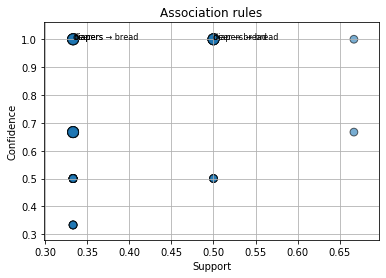

In [32]:
import matplotlib.pyplot as plt

# ── basic scatter bubble plot ──────────────────────────────────────────
plt.figure(figsize=(6, 4))

plt.scatter(
    rules["support"],
    rules["confidence"],
    s=rules["lift"] * 60,        # scale bubbles by lift
    alpha=0.6,
    edgecolor="k"
)

plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association rules")
plt.grid(True)

# optional – annotate the top-lift rules
top = rules.sort_values("lift", ascending=False).head(5)
for _, row in top.iterrows():
    plt.text(
        row["support"],
        row["confidence"],
        " → ".join(list(row["consequents"])),
        fontsize=8,
        ha="left"
    )

plt.show()

/Users/Bellerofonte/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/Bellerofonte/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


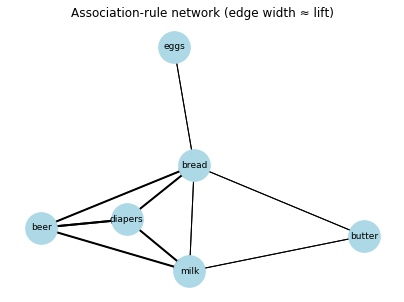

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# ── build a directed graph from the rules ──────────────────────────────
G = nx.DiGraph()

for _, r in rules.iterrows():
    for antecedent in r["antecedents"]:
        for consequent in r["consequents"]:
            G.add_edge(
                antecedent,
                consequent,
                weight=r["lift"],
                confidence=r["confidence"]
            )

# ── draw ──────────────────────────────────────────────────────────────
plt.figure(figsize=(7, 5))
pos = nx.spring_layout(G, k=0.5, seed=42)

edges, weights = zip(*nx.get_edge_attributes(G, "weight").items())
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color="lightblue")
nx.draw_networkx_labels(G, pos, font_size=9)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[w for w in weights], arrows=True)

plt.title("Association-rule network (edge width ≈ lift)")
plt.axis("off")
plt.show()